Saved model: tmp/cluster.ge
sampling
sampling done
preprocessing grammar
_sample_notes: None
accept_annealing_factor: 0
accept_static_penalty: 0.65
batch_size: 1
   burnout: 0
complexity: 3
estimatorobject: <graphlearn.estimator.estimator instance at 0x41751b8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x4175638>
generatormode: False
hash_bitmask: 1048575
keep_duplicates: False
local_substitutable_graph_grammar: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x416db10>
    n_jobs: 1
   n_steps: 100
      nbit: 20
node_entity_check: <function <lambda> at 0x4174488>
postprocessor: <graphlearn.postprocessing.PostProcessor instance at 0x41756c8>
probabilistic_core_choice: True
radius_list: [0, 2]
same_core_size: False
same_radius: False
sample_path: None
sampling_interval: 21
select_cip_max_tries: 100
similarity: -1
      step: None
thickness_list: [2]
vectorizer: graph.Vectorizer( r = 3, d = 3, min_r = 0, min_d = 0, nb

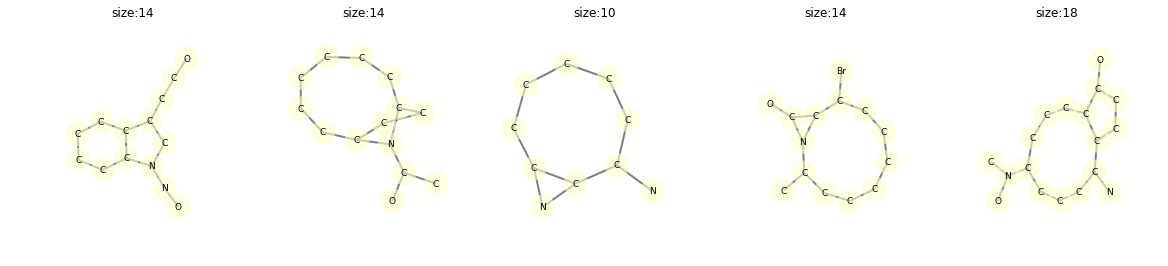

iteration:0
Working with 24 cores
iteration:1
Working with 21 cores
iteration:2
Working with 7 cores
iteration:3
Working with 24 cores
iteration:4
Working with 14 cores
iteration:5
Working with 14 cores
iteration:6
Working with 24 cores
iteration:7
Working with 7 cores
iteration:8
Working with 24 cores
iteration:9
Working with 14 cores
iteration:10
Working with 9 cores
iteration:11
Working with 7 cores
iteration:12
Working with 21 cores
iteration:13
Working with 7 cores
iteration:14
Working with 24 cores
iteration:15
Working with 7 cores
iteration:16
Working with 24 cores
iteration:17
Working with 24 cores
iteration:18
Working with 14 cores
iteration:19
Working with 24 cores
iteration:20
Working with 21 cores
iteration:21
Working with 7 cores
iteration:22
Working with 7 cores
iteration:23
Working with 24 cores
iteration:24
Working with 24 cores
iteration:25
Working with 24 cores
iteration:26
Working with 14 cores
iteration:27
Working with 14 cores
iteration:28
Working with 21 cores
ite

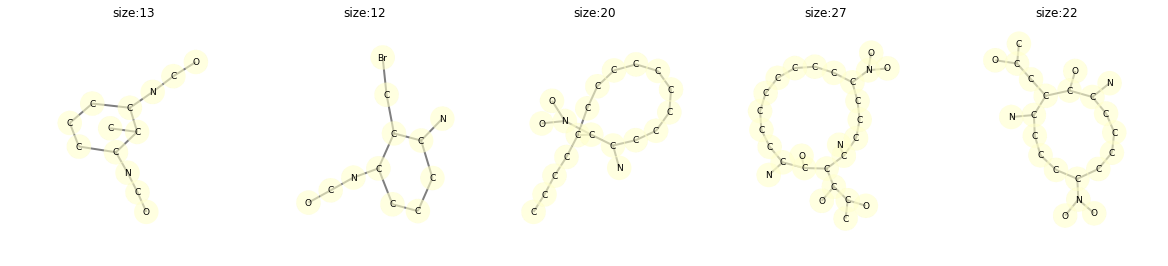

iteration:0
Working with 2 cores
iteration:1
Working with 7 cores
iteration:2
Working with 14 cores
iteration:3
Working with 14 cores
iteration:4
Working with 4 cores
iteration:5
Working with 14 cores
iteration:6
Working with 3 cores
iteration:7
Working with 24 cores
iteration:8
Working with 3 cores
iteration:9
Working with 24 cores
iteration:10
Working with 14 cores
iteration:11
Working with 7 cores
iteration:12
Working with 24 cores
iteration:13
Working with 24 cores
iteration:14
Working with 24 cores
iteration:15
Working with 3 cores
iteration:16
Working with 3 cores
iteration:17
Working with 7 cores
iteration:18
Working with 7 cores
iteration:19
Working with 24 cores
iteration:20
Working with 24 cores
iteration:21
Working with 3 cores
iteration:22
Working with 14 cores
iteration:23
Working with 24 cores
iteration:24
Working with 3 cores
iteration:25
Working with 14 cores
iteration:26
Working with 21 cores
iteration:27
Working with 24 cores
iteration:28
Working with 14 cores
iterati

KeyboardInterrupt: 

In [1]:
%%time
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)


'''
GOOD STUFF  lets test the directed sampling
'''
import os
os.nice(19)
%matplotlib inline

import graphlearn.utils.draw as myutils
import graphlearn.trial_samplers.directedsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg
steps=100

#sampler=ds.directedSampler(vectorizer=eg.Vectorizer(  normalization=False, inner_normalization=False))
sampler= ds.directedSampler(thickness_list=[1])
food=gspan_to_eden( 'bursi.pos.gspan' )
food= itertools.islice(food,200)
sampler.fit(food,  n_jobs=-1)
sampler.save('tmp/cluster.ge')
#print 'saved'
#sampler.load('tmp/cluster.ge')

graphs = gspan_to_eden( 'bursi.pos.gspan' )
graphs = itertools.islice(graphs,200)
targetz = gspan_to_eden( 'bursi.pos.gspan' )
targetz = itertools.islice(targetz,5)

print 'sampling'
graphs = sampler.sample(graphs,
                        start_graphs=targetz,
                        start_gr_in_graph_iter=True,
                        n_samples=5,
                        batch_size=1,
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        #accept_annealing_factor=0.7,
                        accept_static_penalty= 0.65
                        )

print 'sampling done'
history=[]
for  i, gr in enumerate(graphs):
    print i,gr
    history.append(gr.graph['sampling_info']['score_history'])
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'])

t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[6:]:
    plt.plot(t, h)
plt.show()



In [ ]:
a=range(3)
b=range(3)
for c,d in zip(a,b):
    print c,d

sampling
sampling done
0 


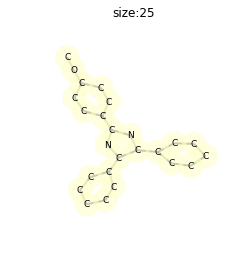

1 (())_with_int_labels


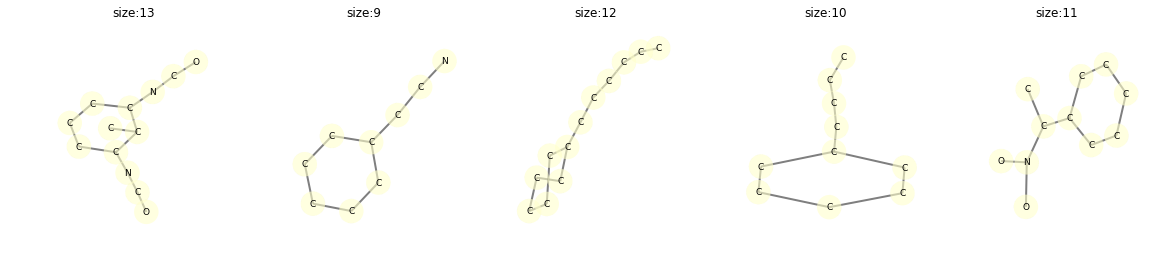

In [ ]:
%%time

'''
 directed sampling 
'''
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.trial_samplers.directedsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)


# preparing sampler
sampler = ds.directedSampler()

def save():
    food=gspan_to_eden( 'bursi.pos.gspan' )
    food= itertools.islice(food,50)
    sampler.fit(food,  n_jobs=3)
    sampler.save('tmp/cluster.ge')
    print 'saved'

#save()
sampler.load('tmp/cluster.ge')




# creating food for sampling
graphs = gspan_to_eden( 'bursi.pos.gspan' )
graphs = itertools.islice(graphs,9)

targetz = gspan_to_eden( 'bursi.pos.gspan' )
targetz = itertools.islice(targetz,200)
#target_vect = sampler.get_average_vector(targetz)

#print target_vect.shape
#g=graphs.next()
#v= sampler.vectorizer.transform_single(g)
#print target_vect.dot(v.T)[0,0]

print 'sampling'
steps=200
graphs = sampler.sample(graphs,
                        target_graph=targetz.next(),
                        start_graphs=None,
                        target_vector= None,
                        n_samples=5,
                        batch_size=1,
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        accept_annealing_factor=1.0,
                        accept_static_penalty= 0.45
                        )

print 'sampling done'
history=[]
for  i, gr in enumerate(graphs):
    print i,gr
    history.append(gr.graph['sampling_info']['score_history'])
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'])

t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[6:]:
    plt.plot(t, h)
plt.show()


In [7]:
import numpy as np
np.matrix(np.random.rand(5, 10)).mean(axis=0).shape

(1, 10)

In [8]:
np.matrix(np.random.rand(5, 10)).mean(axis=0)

matrix([[ 0.66302318,  0.60884753,  0.38390459,  0.4124559 ,  0.50540498,
          0.35303513,  0.65330926,  0.66660517,  0.53155256,  0.44495143]])